In [7]:
import os

In [ ]:
os.chdir("./fcc")

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.txt", parse_dates = [0])

df = df.set_index("date")

# Clean data
df = df[(df["value"] > df["value"].quantile(0.025)) & (df["value"] < df["value"].quantile(0.975))]


def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots()
    ax = sns.lineplot(data = pd.Series(df["value"]), legend = False, color = "red")

    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()

    df_bar["month"] = pd.to_datetime(df_bar.index, format = "%m").month_name()

    df_bar["month_no"] = pd.to_datetime(df_bar.index, format = "%m").month

    df_bar["year"] = pd.to_datetime(df_bar.index, format = "%Y").year

    df_bar = df_bar.sort_values("month_no")

    # Draw bar plot
    plot = sns.catplot(x = "year", y = "value", data = df_bar, hue = "month", kind = "bar", ci = None,
                   legend = False)

    plot.set_axis_labels("Years", "Average Page Views")
    plt.xticks(rotation = 90)

    plt.legend(loc = "upper left", title = "Months")
    
    fig = plot.fig

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig = plt.figure(figsize = (11, 4))

    plt.subplot(1,2,1)
    box1 = sns.boxplot(x = "year", y = "value", data = df_box)

    plt.title("Year-wise Box Plot (Trend)")
    plt.xlabel("Year")
    plt.ylabel("Page Views")

    plt.subplot(1,2,2)
    box2 = sns.boxplot(x = "month", y = "value", data = df_box, order = [
        "Jan", "Feb", "Mar", "Apr", "May", "Jun",
        "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    ])

    plt.title("Month-wise Box Plot (Seasonality)")
    plt.xlabel("Month")
    plt.ylabel("Page Views")
        


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


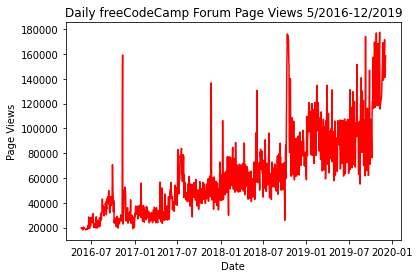

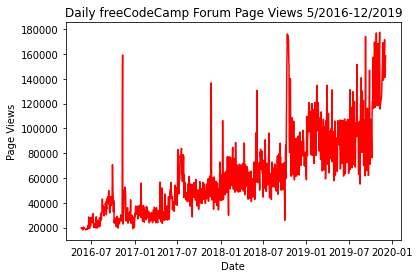

In [17]:
draw_line_plot()

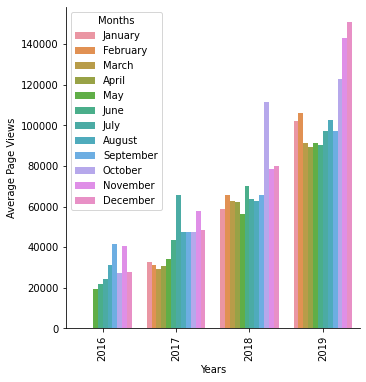

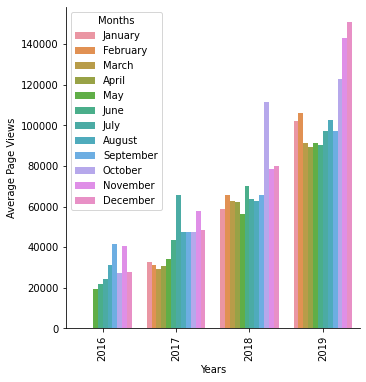

In [18]:
draw_bar_plot()

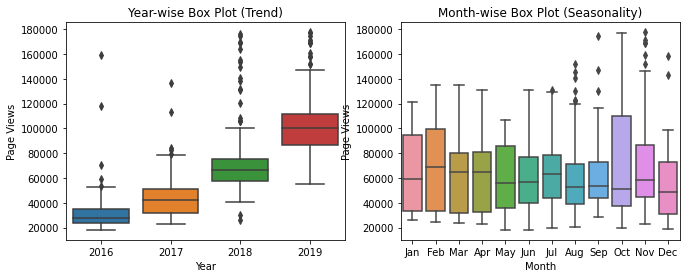

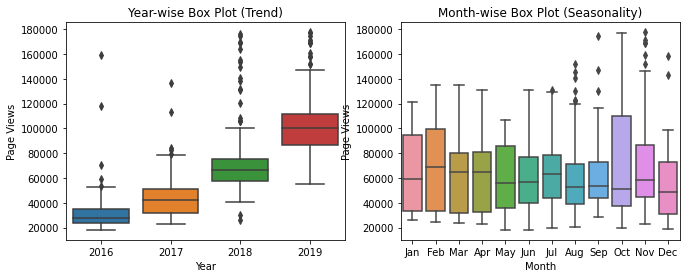

In [19]:
draw_box_plot()